# **Collecting Data**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import shutil
import os

source = r'/content/gdrive/MyDrive/apple dataset/apple_dataset.zip'
destination = r'/tmp/apple_dataset.zip'
shutil.copyfile(source, destination)

'/tmp/apple_dataset.zip'

In [ ]:
import zipfile 
local_zip = destination
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

# **Explore Data and Preprocessing**

In [ ]:
path = r'/tmp/apple_dataset/'
labels = os.listdir(path)
labels

['15', '2', '10']

In [ ]:
#Check the number of images for each class and set
for label in labels:
  print(f"There are {len(os.listdir(path+label))} images in {label} days directory.")

There are 68 images in 15 days directory.
There are 12 images in 2 days directory.
There are 514 images in 10 days directory.


In [ ]:
import os
from PIL import Image 
two_days = r'/tmp/apple_dataset/2/'
fifteen_days = r'/tmp/apple_dataset/15/'
two_days_fnames = os.listdir(two_days)
fifteen_days_fnames = os.listdir(fifteen_days)

for image in two_days_fnames:
  img = Image.open(two_days+image)
  rotate= img.rotate(35).save(two_days+'rotated35'+image)

for image in two_days_fnames:
  img = Image.open(two_days+image)
  rotate= img.rotate(80).save(two_days+'rotated70'+image)
            
for image in two_days_fnames:
  img = Image.open(two_days+image)
  rotate_img= img.rotate(100).save(two_days+'rotated105'+image)

for image in two_days_fnames:
  img = Image.open(two_days+image)
  rotate_img= img.rotate(140).save(two_days+'rotated140'+image)

for image in two_days_fnames:
  img = Image.open(two_days+image)
  rotate_img= img.rotate(175).save(two_days+'rotated175'+image)

for image in two_days_fnames:
  img = Image.open(two_days+image)
  rotate_img= img.rotate(210).save(two_days+'rotated210'+image)

for image in two_days_fnames:
  img = Image.open(two_days+image)
  rotate_img= img.rotate(245).save(two_days+'rotated245'+image)

for image in two_days_fnames:
  img = Image.open(two_days+image)
  rotate_img= img.rotate(270).save(two_days+'rotated270'+image)

for image in two_days_fnames:  
  img = Image.open(two_days+image)
  rotate_img= img.rotate(300).save(two_days+'rotated300'+image)

for image in fifteen_days_fnames:  
  img = Image.open(fifteen_days+image)
  rotate_img= img.rotate(270).save(fifteen_days+'rotated270'+image)

for image in fifteen_days_fnames:  
  img = Image.open(fifteen_days+image)
  rotate_img= img.rotate(35).save(fifteen_days+'rotated35'+image)


In [ ]:
for label in labels:
  print(f"There are {len(os.listdir(path+label))} images in {label} days directory.")

There are 204 images in 15 days directory.
There are 120 images in 2 days directory.
There are 514 images in 10 days directory.


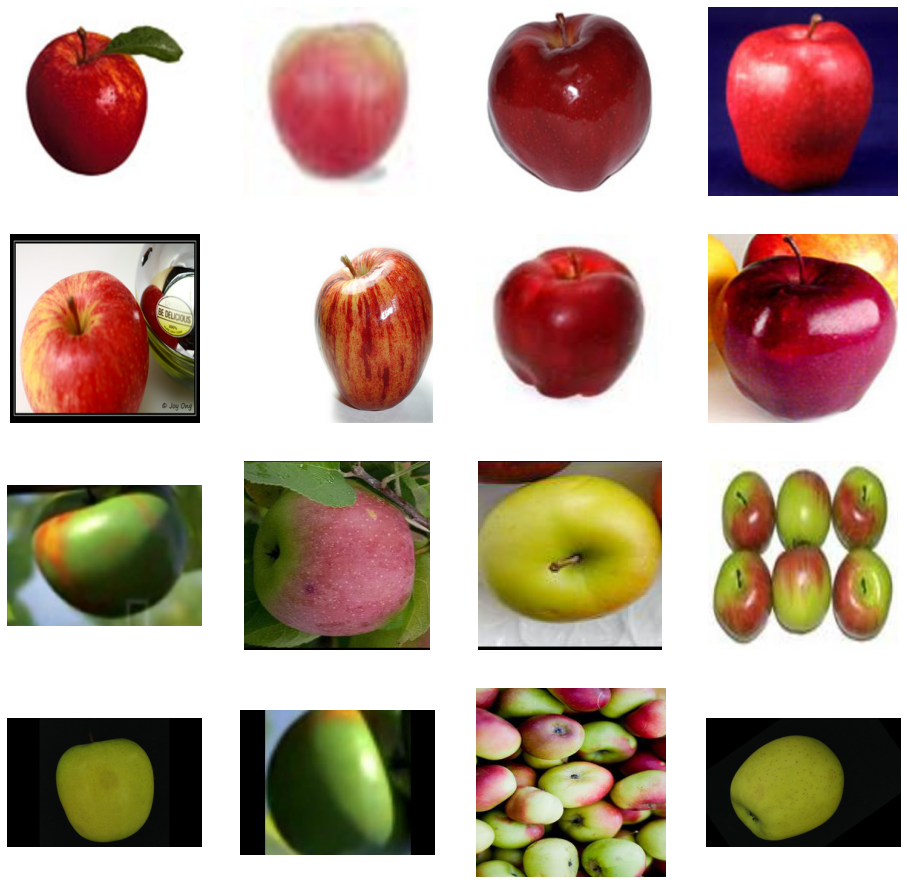

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_apple10_pix = [os.path.join('/tmp/apple_dataset/10/', fname) 
                for fname in os.listdir('/tmp/apple_dataset/10/')[ pic_index-8:pic_index] 
               ]
next_apple15_pix = [os.path.join('/tmp/apple_dataset/15/', fname) 
                for fname in os.listdir('/tmp/apple_dataset/15/')[ pic_index-8:pic_index] 
               ]
               
for i, img_path in enumerate(next_apple10_pix+next_apple15_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest',
      validation_split=0.2)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2)


In [ ]:
train_generator = train_datagen.flow_from_directory(
        path,  
        target_size=(125, 125),#rev mentoring
        batch_size=32,
        class_mode='categorical',
        subset='training')
val_generator = train_datagen.flow_from_directory(
        path,  
        target_size=(125, 125),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 672 images belonging to 3 classes.
Found 166 images belonging to 3 classes.


# **Make model**

In [ ]:
# Hasil Edit Model ML Versi 1.0
from tensorflow.keras.applications import Xception, VGG16, InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

### Tipe Model Transfer Learning ###

# Inception V3

pre_trained_model = InceptionV3(
    input_shape = (125, 125, 3),
    include_top = False,
)



# VGG16
"""
pre_trained_model = VGG16(
    input_shape = (100, 100, 3),
    include_top = False
)
"""

"""
# Xception
pre_trained_model = Xception(
    input_shape = (100, 100, 3),
    include_top = False
)
"""

# pre_trained_model.layers.pop()

### Tipe Freeze Layer ###

# Opsi 1
for layer in pre_trained_model.layers[:160]:
  layer.trainable = False
for layer in pre_trained_model.layers[160:]:
  layer.trainable = True

# Opsi 2
"""
for layer in pre_trained_model.layers[:-4]:
  layer.trainable = False
"""

### Tipe Last Output ###

# Opsi 1
# last_layer = pre_trained_model.get_layer('mixed7')
# x = layers.Flatten()(last_output)

# Opsi 2
# last_output = pre_trained_model.layers[-1].output
# x = layers.Flatten()(last_output)

# Opsi 3
x = layers.GlobalAveragePooling2D()
x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)           
x = layers.Dense(3, activation='softmax')(x)


# Opsi 4
"""
x = layer.Dropout(0.2)(pre_trained_model.output)
x = layers.Flatten()(x)
x = layer.Dense(1024, activation = 'relu')(x)
x = layer.Dense(6, activation = 'softmax')(x)
"""

model = Model(pre_trained_model.input, x) 

model.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 125, 125, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 62, 62, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 62, 62, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                             

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
from keras import callbacks
from keras.callbacks import ModelCheckpoint
earlystop = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 15, 
                                        restore_best_weights = True)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99!")
callbacks = myCallback()

In [ ]:
modelcheck = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history=model.fit(
      train_generator,
      steps_per_epoch=20, 
      epochs=80,
      validation_data=val_generator, 
      validation_steps=5, 
      callbacks=[modelcheck,callbacks],
      verbose=1)

Epoch 1/80
20/20 [==============================] - ETA: 0s - loss: 3.7292 - accuracy: 0.6219
Epoch 1: val_accuracy improved from -inf to 0.60625, saving model to best_model.h5
20/20 [==============================] - 33s 595ms/step - loss: 3.7292 - accuracy: 0.6219 - val_loss: 40285.0039 - val_accuracy: 0.6062
Epoch 2/80
20/20 [==============================] - ETA: 0s - loss: 1.4121 - accuracy: 0.7734
Epoch 2: val_accuracy improved from 0.60625 to 0.61250, saving model to best_model.h5
20/20 [==============================] - 9s 450ms/step - loss: 1.4121 - accuracy: 0.7734 - val_loss: 4930.3779 - val_accuracy: 0.6125
Epoch 3/80
20/20 [==============================] - ETA: 0s - loss: 0.9521 - accuracy: 0.8734
Epoch 3: val_accuracy did not improve from 0.61250
20/20 [==============================] - 7s 373ms/step - loss: 0.9521 - accuracy: 0.8734 - val_loss: 292.7655 - val_accuracy: 0.5312
Epoch 4/80
20/20 [==============================] - ETA: 0s - loss: 0.8883 - accuracy: 0.8953
E

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(val_generator)

print('Accuracy train: ', score_train[1])
print('Accuracy test: ', score_valid[1])

6/6 [==============================] - 3s 432ms/step - loss: 0.0740 - accuracy: 0.9699
Accuracy train:  0.992559552192688
Accuracy test:  0.9698795080184937


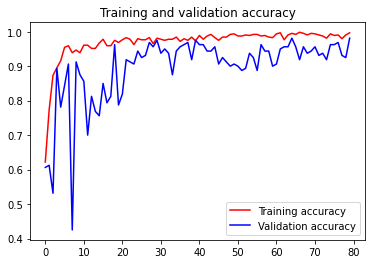

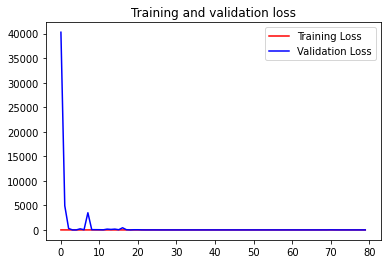

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **Try test some images**

In [ ]:
#get index so we could know the order
train_generator.class_indices

{'10': 0, '15': 1, '2': 2}

Saving apple.jpeg to apple.jpeg
apple.jpeg
[[1. 0. 0.]]
Resistance level = 10 days remaining (100% fresh)


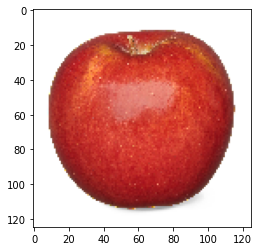

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(125,125))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size= 32)
  hasil = np.argmax(classes)
  print(fn)
  print(classes)

 
  if classes[0,0] == 1.0:
    print('Resistance level = 10 days remaining (100% fresh)')
  elif classes[0,1] == 1.0:
    print('Resistance level = 15 days remaining (100% fresh)')
  else:
    print('Resistance level = 2 days remaining (20% fresh)')

# **Export Model**

In [ ]:
%cd /content/gdrive/MyDrive/Capstone_Project/Apple/Model_Apple_InceptionV3_rmsprop

/content/gdrive/MyDrive/Capstone_Project/Apple/Model_Apple_InceptionV3_rmsprop


In [ ]:
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\n Already saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


 Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets


INFO:tensorflow:Assets written to: /tmp/1/assets



export_path = /tmp/1
total 5200
drwxr-xr-x 2 root root    4096 Jun  5 13:49 assets
-rw-r--r-- 1 root root  646490 Jun  5 13:49 keras_metadata.pb
-rw-r--r-- 1 root root 4668901 Jun  5 13:49 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  5 13:49 variables


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

tflite_model = converter.convert()
tflite_model_file = 'Apple-durability-prediction.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('Apple-durability-prediction.txt', 'w') as f:
    f.write('\n'.join(labels))

In [ ]:
try:
    files.download('Apple-durability-prediction.tflite')
    files.download('Apple-durability-prediction.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
saved_model_path = "./Apple-durability-prediction.h5"
model.save(saved_model_path)

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Use the tensorflow.js converter to convert the saved Keras model into JSON format.
!tensorflowjs_converter --input_format=keras {saved_model_path} ./modeljs